In [ ]:
import pandas as pd
# Try reading the file with 'latin-1' encoding

df = pd.read_csv('/content/Diwali Sales Data.csv', encoding='latin-1')

display(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [ ]:
#Below is the EDA of Diwali_Sales_Data

# Droping unused columns and nulls, rows (axis=0) or columns (axis=1).

df.drop(['Status', 'unnamed1'], axis=1, inplace=True)
df.dropna(inplace=True)

# Ensure correct data types

df['Amount'] = df['Amount'].astype(float)
df['Orders'] = df['Orders'].astype(int)

display(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


,count
Gender,
F,7832
M,3407


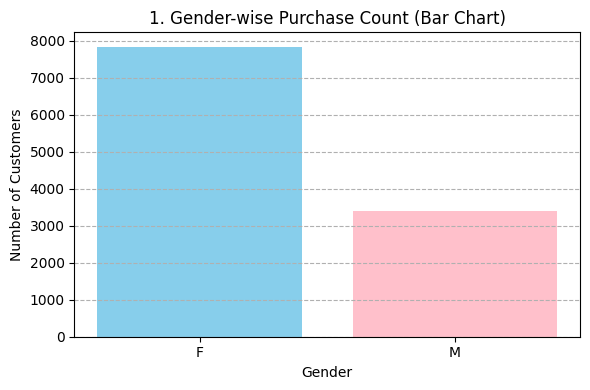

In [ ]:
# 1)Bar Chart — Gender-wise Purchase Count
#Purpose: Show how many males vs. females are shopping.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gender_counts = df['Gender'].value_counts()

display(gender_counts)

plt.figure(figsize=(6,4))

plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'pink'])

plt.title('1. Gender-wise Purchase Count (Bar Chart)')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()

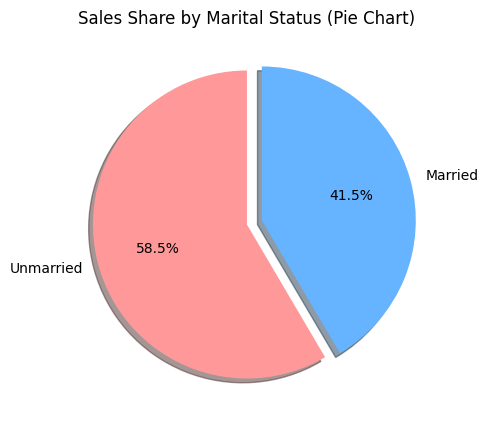

In [ ]:
#2)Pie Chart — Sales Share by Marital Status
#Purpose: Visualize the percentage of sales from married vs unmarried customers.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

marital_sales = df.groupby('Marital_Status')['Amount'].sum()
labels = ['Unmarried', 'Married']
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(5,5))

plt.pie(marital_sales, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,explode=(0,0.1),shadow =True)

plt.title('Sales Share by Marital Status (Pie Chart)')

plt.show()

,Amount
Age,
12,8607.098039
13,8688.056604
14,8938.656250
15,9554.396226
16,9837.163934
...,...
88,11337.090909
89,7931.800000
90,10274.454545


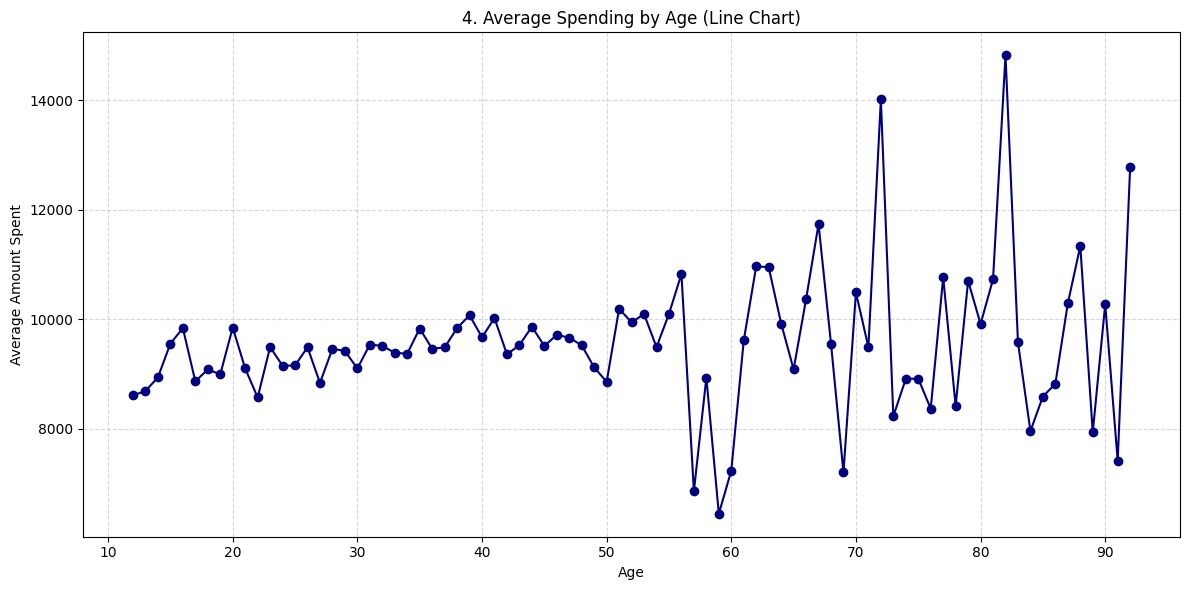

In [ ]:
#3)Line Chart — Sales Trend by Age (Average Spend)
#Purpose: Analyze how average spending changes with age.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

avg_spend_by_age = df.groupby('Age')['Amount'].mean().sort_index()
display(avg_spend_by_age)

plt.figure(figsize=(12,6))

plt.plot(avg_spend_by_age.index, avg_spend_by_age.values, marker='o', color='navy')

plt.title('4. Average Spending by Age (Line Chart)')
plt.xlabel('Age')
plt.ylabel('Average Amount Spent')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

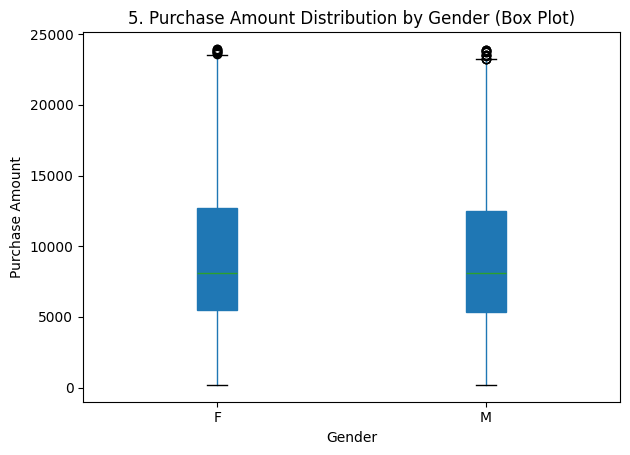

In [ ]:
#4)Box Plot — Amount Distribution by Gender
#Compare purchase amount spread between males and females.
#Interquartile Range (IQR):
#The IQR is calculated as:
#IQR=Q3−Q1
#Q3 = DOT
#Q1 = below line

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

df.boxplot(column='Amount', by='Gender', grid=False, patch_artist=True)

plt.title('5. Purchase Amount Distribution by Gender (Box Plot)')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.tight_layout()
plt.show()


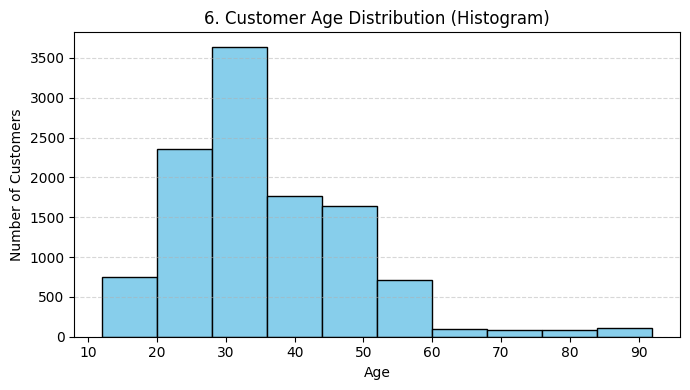

In [ ]:
#5) Histogram — Customer Age Distribution
#Show distribution of customers across age.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))

plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')

plt.title('6. Customer Age Distribution (Histogram)')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

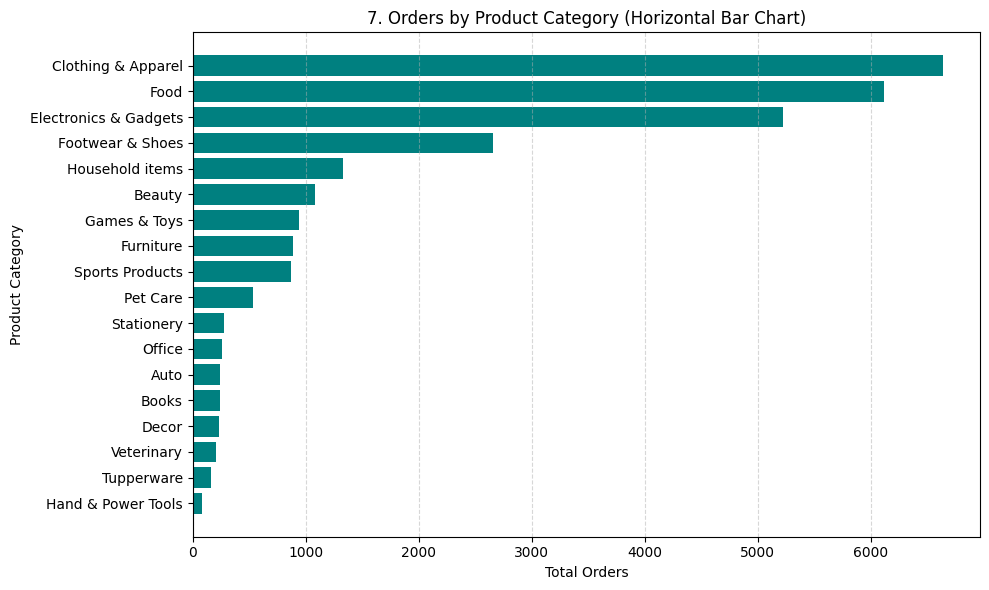

In [ ]:
#6) Horizontal Bar Chart — Product Category Orders
# Show which product categories get the most orders.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

product_orders = df.groupby('Product_Category')['Orders'].sum().sort_values()

plt.figure(figsize=(10,6))

plt.barh(product_orders.index, product_orders.values, color='teal')

plt.title('7. Orders by Product Category (Horizontal Bar Chart)')
plt.xlabel('Total Orders')
plt.ylabel('Product Category')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

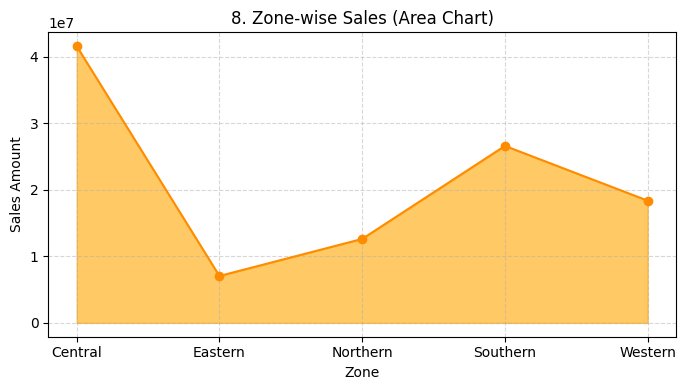

In [ ]:
#7) Area Chart — Sales by Zone
#Compare sales contribution by zones in a flowing format.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

zone_sales = df.groupby('Zone')['Amount'].sum()
zones = zone_sales.index
values = zone_sales.values

plt.figure(figsize=(7,4))
plt.fill_between(zones, values, color='orange', alpha=0.6)
plt.plot(zones, values, marker='o', color='darkorange')
plt.title('8. Zone-wise Sales (Area Chart)')
plt.xlabel('Zone')
plt.ylabel('Sales Amount')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

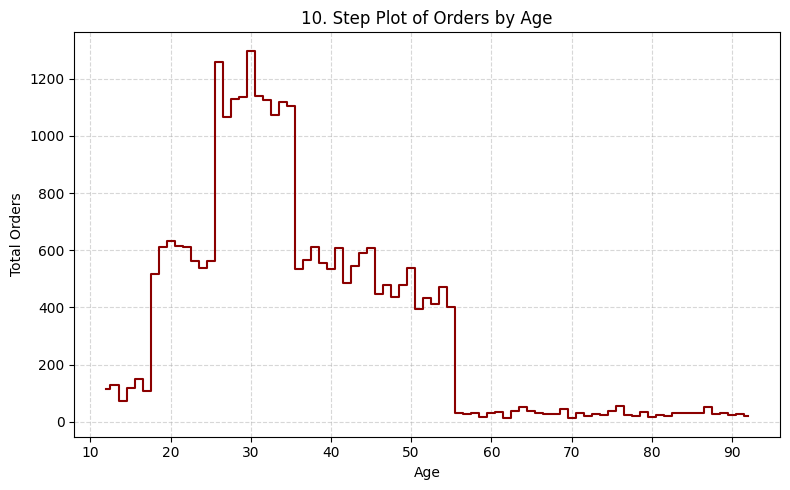

In [ ]:
#8) Step Plot — Orders per Age (Quantized View)
#See changes in order volume by age in a discrete step view.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

orders_by_age = df.groupby('Age')['Orders'].sum().sort_index()

plt.figure(figsize=(8,5))

plt.step(orders_by_age.index, orders_by_age.values, where='mid', color='darkred')

plt.title('10. Step Plot of Orders by Age')
plt.xlabel('Age')
plt.ylabel('Total Orders')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

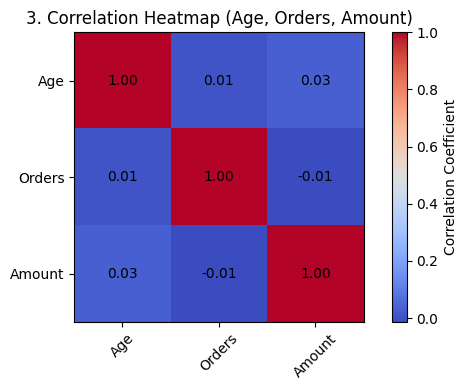

In [ ]:
#9) Heatmap (Correlation between Numeric Features)
#Understand relationships between numerical variables like Age, Orders, and Amount.
# Shows how strongly Orders, Age, and Amount relate. For example, Orders might have a strong positive correlation with Amount.

import numpy as np

# Select numeric columns for correlation
numeric_df = df[['Age', 'Orders', 'Amount']]
corr = numeric_df.corr()

plt.figure(figsize=(6,4))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)

# Annotate the heatmap
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('3. Correlation Heatmap (Age, Orders, Amount)')
plt.tight_layout()
plt.show()

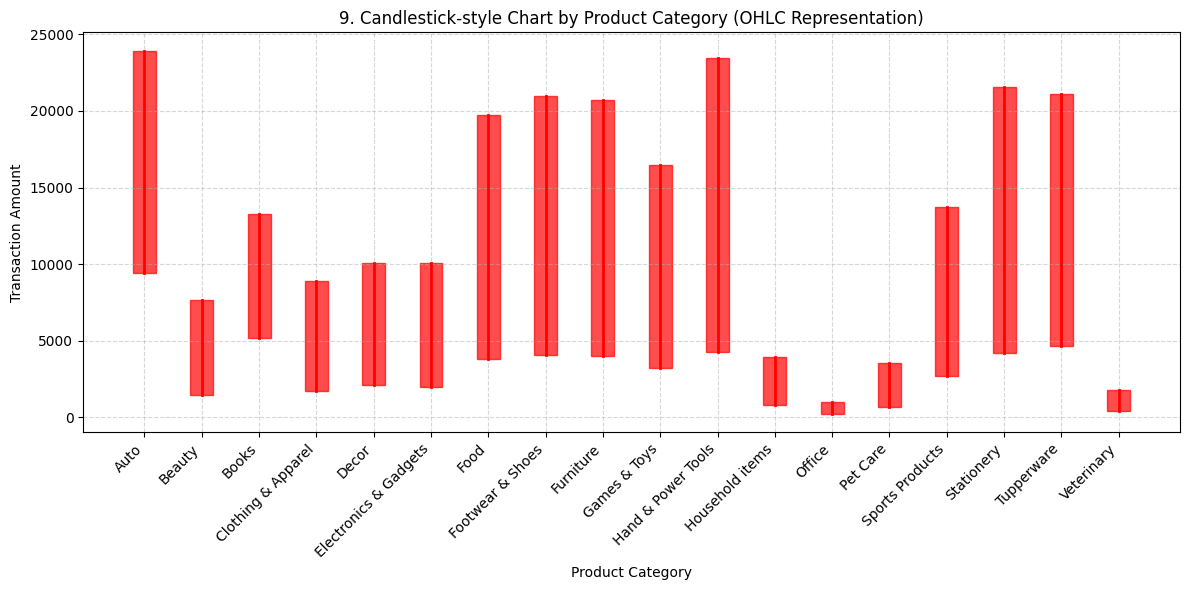

In [ ]:
#Candlestick Chart by Product Category (Adapted OHLC)
#Show price variation (spending behavior) within each product category in a financial-style format.

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd

# Group by Product Category for OHLC-style data
group = df.groupby('Product_Category')['Amount']

ohlc_data = pd.DataFrame({
    'Open': group.first(),
    'High': group.max(),
    'Low': group.min(),
    'Close': group.last()
}).dropna()

categories = ohlc_data.index.tolist()
x = range(len(categories))

plt.figure(figsize=(12,6))
ax = plt.gca()

for i in x:
    row = ohlc_data.iloc[i]
    color = 'green' if row['Close'] >= row['Open'] else 'red'

    # Vertical line for High-Low range
    ax.plot([i, i], [row['Low'], row['High']], color=color, linewidth=2)

    # Rectangle for Open-Close
    rect = Rectangle((i - 0.2, min(row['Open'], row['Close'])),
                     0.4,
                     abs(row['Open'] - row['Close']),
                     color=color,
                     alpha=0.7)
    ax.add_patch(rect)

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
plt.title('9. Candlestick-style Chart by Product Category (OHLC Representation)')
plt.xlabel('Product Category')
plt.ylabel('Transaction Amount')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

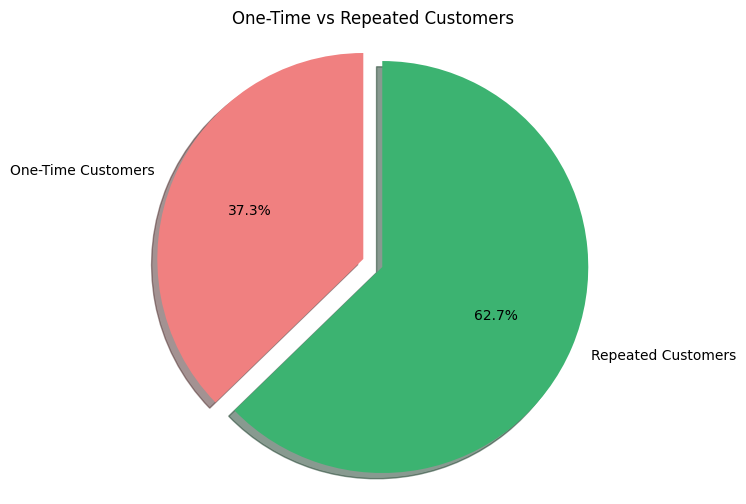

In [ ]:
# Pie Chart: One-Time vs Repeated Customers

import matplotlib.pyplot as plt

# Count number of purchases per customer
customer_counts = df['User_ID'].value_counts()

# Classify as One-time or Repeated
one_time = (customer_counts == 1).sum()
repeated = (customer_counts > 1).sum()

# Prepare data for pie chart
labels = ['One-Time Customers', 'Repeated Customers']
sizes = [one_time, repeated]
colors = ['lightcoral', 'mediumseagreen']

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0,0.1),shadow=True)
plt.title("One-Time vs Repeated Customers")
plt.axis('equal')
plt.show()